# Modelos Generativos para Recuperação de Informação

Nome: Arthur Pontes Nader

Matrícula: 2019022294

## Extração de informação estruturada

In [1]:
!python3 --version

Python 3.10.12


In [1]:
import openai

from bs4 import BeautifulSoup
from urllib.request import urlopen
from scrapeghost import SchemaScraper

In [3]:
arq = open("chave_openai.txt")
api_key = arq.read()
arq.close()

In [4]:
openai.api_key = api_key

### Tarefa 1

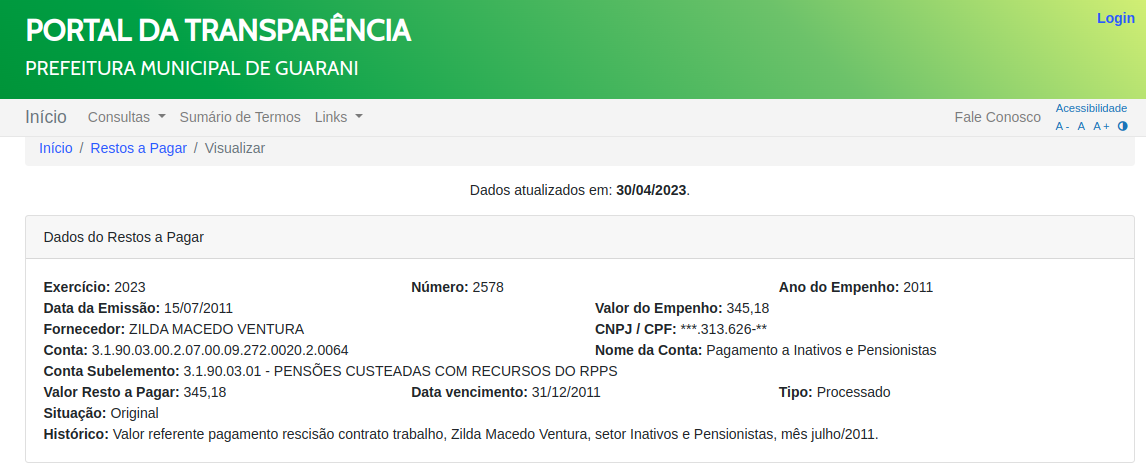

In [2]:
html = urlopen('https://pm-guarani.publicacao.siplanweb.com.br/restos-pagar/visualizar/13936')

soup = BeautifulSoup(html, 'html.parser')
dados = soup.find_all('div', class_='row')

fornecedor = dados[2].find('strong', string='Fornecedor:').next_sibling.strip()
ano = dados[0].find('strong', string='Ano do Empenho:').next_sibling.strip()
numero = dados[0].find('strong', string='Número:').next_sibling.strip()
tipo = dados[5].find('strong', string='Tipo:').next_sibling.strip()

print("Fornecedor:", fornecedor)
print("Ano:", ano)
print("Número:", numero)
print("Tipo:", tipo)

Fornecedor: ZILDA MACEDO VENTURA
Ano: 2011
Número: 2578
Tipo: Processado


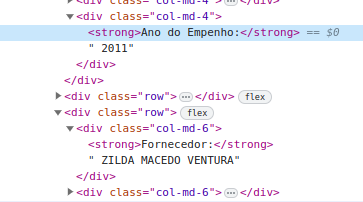

#### Scrapeghost

In [111]:
scrape_fornecedores = SchemaScraper(
  schema={
      "fornecedor": "string",
      "ano": "int",
      "numero": "int",
      "tipo": "string"}
)

In [112]:
resp = scrape_fornecedores("https://pm-guarani.publicacao.siplanweb.com.br/restos-pagar/visualizar/13936")
resp.data

2023-06-25 22:38:36 [debug    ] got HTML                       length=16766 url=https://pm-guarani.publicacao.siplanweb.com.br/restos-pagar/visualizar/13936
2023-06-25 22:38:36 [debug    ] preprocessor                   from_nodes=1 name=CleanHTML nodes=1
2023-06-25 22:38:36 [info     ] API request                    html_tokens=3871 model=gpt-3.5-turbo
2023-06-25 22:38:39 [info     ] API response                   completion_tokens=42 cost=0.007995 duration=3.6292502880096436 finish_reason=stop prompt_tokens=3966
2023-06-25 22:38:39 [debug    ] postprocessor                  data={
  "fornecedor": "ZILDA MACEDO VENTURA",
  "ano": 2011,
  "numero": 2578,
  "tipo": "Processado"
} data_type=<class 'str'> postprocessor=JSONPostprocessor(nudge=True))


{'fornecedor': 'ZILDA MACEDO VENTURA',
 'ano': 2011,
 'numero': 2578,
 'tipo': 'Processado'}

### Tarefa 2

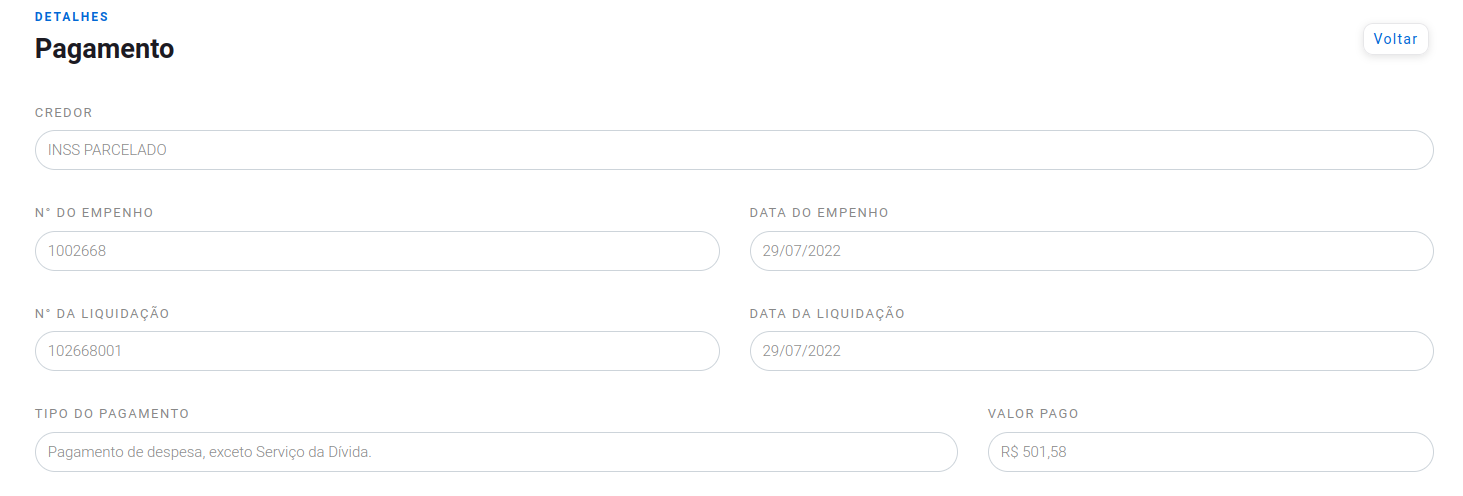

In [160]:
html = urlopen('https://sardoa.mg.gov.br/transparencia/pagamentos/exibir/2022/10/65001')

soup = BeautifulSoup(html, 'html.parser')
dados = soup.find_all('div', class_="form-group acessibilidade-fonte mt-2")

credor = dados[0].find('input')['value']
numero = dados[1].find('input')['value']
valor = dados[6].find('input')['value']

print("Credor:", credor)
print("Numero do empenho:", numero)
print("Valor pago:", valor)

Credor: INSS PARCELADO
Numero do empenho: 1002668
Valor pago: R$ 501,58


#### Scrapeghost

In [158]:
scrape_credores = SchemaScraper(
  schema={
      "Credor": "string",
      "Numero do empenho": "int",
      "Valor pago": "string",}
)

In [159]:
resp = scrape_credores("https://sardoa.mg.gov.br/transparencia/pagamentos/exibir/2022/10/65001")
resp.data

2023-06-26 00:12:59 [debug    ] got HTML                       length=17076 url=https://sardoa.mg.gov.br/transparencia/pagamentos/exibir/2022/10/65001
2023-06-26 00:12:59 [debug    ] preprocessor                   from_nodes=1 name=CleanHTML nodes=1
2023-06-26 00:12:59 [info     ] API request                    html_tokens=3658 model=gpt-3.5-turbo
2023-06-26 00:13:02 [info     ] API response                   completion_tokens=25 cost=0.007543500000000001 duration=2.5602478981018066 finish_reason=stop prompt_tokens=3753
2023-06-26 00:13:02 [debug    ] postprocessor                  data={
  "Credor": "",
  "Numero do empenho": null,
  "Valor pago": ""
} data_type=<class 'str'> postprocessor=JSONPostprocessor(nudge=True))


{'Credor': '', 'Numero do empenho': None, 'Valor pago': ''}

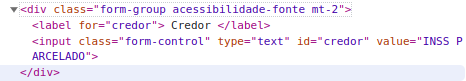

### Tarefa 3

In [110]:
scrape_professor = SchemaScraper(
  schema={
      "nome": "string",
      "sala": "int",
      "ramal": "int"}
)

In [113]:
resp = scrape_professores("https://dcc.ufmg.br/professor/rodrygo-luis-teodoro-santos/")
resp.data

2023-06-25 22:38:58 [debug    ] got HTML                       length=202932 url=https://dcc.ufmg.br/professor/rodrygo-luis-teodoro-santos/
2023-06-25 22:38:58 [debug    ] preprocessor                   from_nodes=1 name=CleanHTML nodes=1
2023-06-25 22:38:58 [warning  ] API request failed             attempts=0 model=gpt-3.5-turbo
HTML is 42038 tokens, max for gpt-3.5-turbo is 4096
2023-06-25 22:38:58 [warning  ] retry                          model=gpt-4 wait=30
2023-06-25 22:39:28 [warning  ] API request failed             attempts=0 model=gpt-4
HTML is 42038 tokens, max for gpt-4 is 8192


TooManyTokens: HTML is 42038 tokens, max for gpt-4 is 8192